CNN-Image classify

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import cv2
import os
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
from os import listdir
from os.path import isfile, join

IMPORT DATASET

In [ ]:
!wget http://techno.varee.ac.th/colab/mosquito.zip
!unzip --qq mosquito.zip

--2021-09-07 07:02:32--  http://techno.varee.ac.th/colab/mosquito.zip
Resolving techno.varee.ac.th (techno.varee.ac.th)... 110.164.57.36
Connecting to techno.varee.ac.th (techno.varee.ac.th)|110.164.57.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28715057 (27M) [application/zip]
Saving to: ‘mosquito.zip’

mosquito.zip        100%[===================>]  27.38M  5.20MB/s    in 6.6s    

2021-09-07 07:02:40 (4.15 MB/s) - ‘mosquito.zip’ saved [28715057/28715057]



In [ ]:
width = 128
num_classes = 2
trainpath = 'train/'
testpath = 'test/'
trainImg = [trainpath+f for f in listdir(trainpath) if listdir(join(trainpath, f))]
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]

In [ ]:
trainImg

['train/Culex', 'train/Aedes']

In [ ]:
def img2data(path):
  rawImgs = []
  labels = []
  c = 0
  for imagePath in (path):
      for item in tqdm(os.listdir(imagePath)):
          file = os.path.join(imagePath, item)
          #print(file)
          c+=1
          l = imagePath.split('/')[1]
          
          if l == 'Aedes':
            labels.append([1,0])         
          elif l == 'Culex':
            labels.append([0,1])
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)
  return rawImgs, labels

In [ ]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 30/30 [00:00<00:00, 766.49it/s]


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((1200, 128, 128, 3), (1200, 2), (60, 128, 128, 3), (60, 2))

In [ ]:
model = keras.Sequential([
        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(width, width, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128,(3,3) , activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2 )),
        keras.layers.Dense(16),
        keras.layers.Flatten(),

        keras.layers.Dense(num_classes, activation='softmax') #softmax for one hot . . # sigmoid for 0/1
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 30, 30, 16)        2064      
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy'
                , metrics= ['accuracy'])
batch_size = 32
epochs = 10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/10
38/38 [==============================] - 35s 128ms/step - loss: 0.6493 - accuracy: 0.6325 - val_loss: 0.5897 - val_accuracy: 0.7833
Epoch 2/10
38/38 [==============================] - 3s 91ms/step - loss: 0.4805 - accuracy: 0.8083 - val_loss: 0.4579 - val_accuracy: 0.7500
Epoch 3/10
38/38 [==============================] - 3s 88ms/step - loss: 0.3436 - accuracy: 0.8633 - val_loss: 0.3566 - val_accuracy: 0.8833
Epoch 4/10
38/38 [==============================] - 3s 90ms/step - loss: 0.2465 - accuracy: 0.9133 - val_loss: 0.2947 - val_accuracy: 0.8833
Epoch 5/10
38/38 [==============================] - 3s 90ms/step - loss: 0.1829 - accuracy: 0.9392 - val_loss: 0.2302 - val_accuracy: 0.9333
Epoch 6/10
38/38 [==============================] - 3s 90ms/step - loss: 0.1661 - accuracy: 0.9508 - val_loss: 0.3256 - val_accuracy: 0.8333
Epoch 7/10
38/38 [==============================] - 3s 89ms/step - loss: 0.1505 - accuracy: 0.9517 - val_loss: 0.1598 - val_accuracy: 0.9833
Epoch 8/10


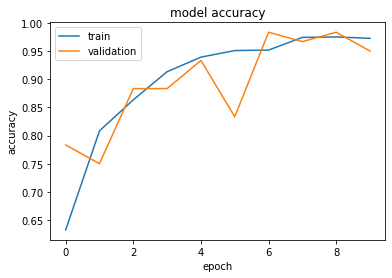

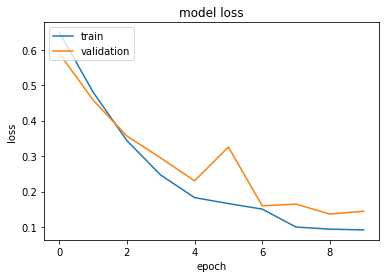

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



---



---



Transfer learning with MobilenetV2

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(width,width,3),
                                                   include_top=False,
                                                   weights='imagenet')
base_model.trainable = False
num_classes = 2

model = keras.Sequential([
        base_model,
        
        keras.layers.Conv2D(128, 3, activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(16),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation='softmax')
    ])


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 2, 128)         1474688   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 1, 128)         0         
_________________________________________________________________
dense_12 (Dense)             (None, 1, 1, 16)          2064      
_________________________________________________________________
flatten_6 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy'
                , metrics= ['accuracy'], weighted_metrics=['accuracy'])

batch_size = 32
epochs = 10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/10
38/38 [==============================] - 7s 90ms/step - loss: 0.3052 - accuracy: 0.9192 - weighted_accuracy: 0.9192 - val_loss: 0.0175 - val_accuracy: 1.0000 - val_weighted_accuracy: 1.0000
Epoch 2/10
38/38 [==============================] - 2s 43ms/step - loss: 0.0097 - accuracy: 0.9967 - weighted_accuracy: 0.9967 - val_loss: 0.0086 - val_accuracy: 1.0000 - val_weighted_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 2s 43ms/step - loss: 0.0027 - accuracy: 0.9992 - weighted_accuracy: 0.9992 - val_loss: 0.0068 - val_accuracy: 1.0000 - val_weighted_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 2s 46ms/step - loss: 8.5705e-04 - accuracy: 1.0000 - weighted_accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000 - val_weighted_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 2s 44ms/step - loss: 9.9330e-04 - accuracy: 1.0000 - weighted_accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000 - val_weighted_accu

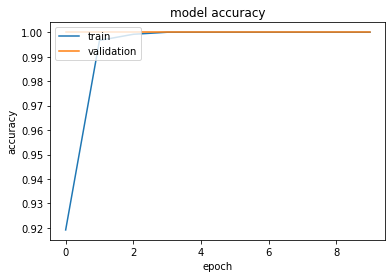

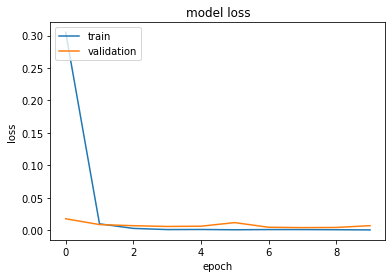

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



---



---


This for try out your image

In [ ]:
testpath = 'test/'
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]
rimg = []
for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        if item.split('.')[0] != "":
           
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,128,128,3))
          predict = model.predict(rimg)
          label = ['Aedes','Culex']
          result = label[np.argmax(predict)]
          print(predict)
          print('real:'+str(item))
          print('predict:'+str(result))
          plt.imshow(ori)
          plt.show()

